In [27]:
# Import Libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [26]:
import pandas as pd
df = pd.read_csv(r"C:\train (1).csv")
base_path = r"C:\Users\pavan\Landmark Detection\images"
print(df.head())

                 id                                                url  \
0  6e158a47eb2ca3f6  https://upload.wikimedia.org/wikipedia/commons...   
1  202cd79556f30760  http://upload.wikimedia.org/wikipedia/commons/...   
2  3ad87684c99c06e1  http://upload.wikimedia.org/wikipedia/commons/...   
3  e7f70e9c61e66af3  https://upload.wikimedia.org/wikipedia/commons...   
4  4072182eddd0100e  https://upload.wikimedia.org/wikipedia/commons...   

   landmark_id  
0       142820  
1       104169  
2        37914  
3       102140  
4         2474  


In [28]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [29]:
samples = 20000
df = df.loc[df["id"].str.startswith('00', na=False), :]
num_cls = len(df["landmark_id"].unique())
num_data = len(df)

In [30]:
num_cls

13589

In [31]:
num_data

16157

In [32]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12


In [33]:
data.tail()

,landmark_id,count
13584,35744,1
13585,117635,1
13586,119649,1
13587,82669,1
13588,149705,1


In [34]:
data.columns = ['landmark_id', 'count']

In [35]:
data['count'].describe()

count    13589.000000
mean         1.188976
std          0.727458
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: count, dtype: float64

In [36]:
data['landmark_id'].describe()

count     13589.000000
mean     101833.646700
std       58898.626573
min           0.000000
25%       50255.000000
50%      101438.000000
75%      153527.000000
max      203073.000000
Name: landmark_id, dtype: float64

(array([1.3582e+04, 6.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

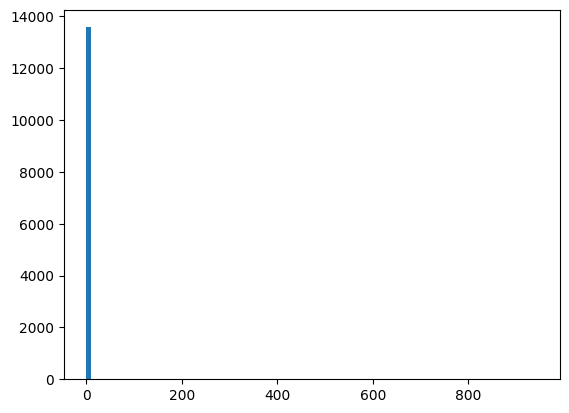

In [37]:
plt.hist(data['count'], 100, range=(0, 944), label='test')

In [38]:
data['count'].between(0,5).sum()

np.int64(13549)

In [39]:
data['count'].between(5,10).sum()

np.int64(69)

(array([1., 2., 1., ..., 1., 1., 5.]),
 array([0.00000e+00, 2.70000e+01, 3.00000e+01, ..., 2.03062e+05,
        2.03071e+05, 2.03073e+05]),
 <BarContainer object of 13588 artists>)

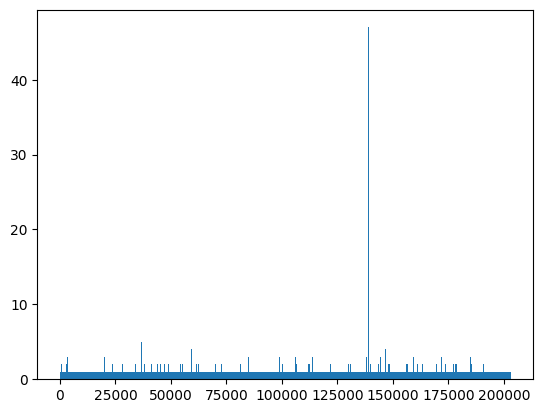

In [40]:
plt.hist(df["landmark_id"], bins=np.sort(df["landmark_id"].unique()))

In [41]:
# Training of Model
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [42]:
df.head()

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937


In [43]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [44]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [45]:
# def get_image_from_number(num,df):
#     fname, label = df.iloc[num, :]
#     fname = fname + '.jpg'
#     f1 = fname[0]
#     f2 = fname[1]
#     f3 = fname[2]
#     path = os.path.join(f1,f2,f3,fname)
#     im = cv2.read(os.path.join(base_path, path))
#     return im, label
def get_image_from_number(num, df):
    fname = df.iloc[num]["id"] + ".jpg"
    label = df.iloc[num]["landmark_id"]

    f1, f2, f3 = fname[0], fname[1], fname[2]
    path = os.path.join(base_path, f1, f2, f3, fname)

    print("DEBUG path:", path)  # 👈 see if this file exists
    im = cv2.imread(path)

    if im is None:
        print(f"[Warning] Image not found: {path}")

    return im, label



4 Sample images from random classes


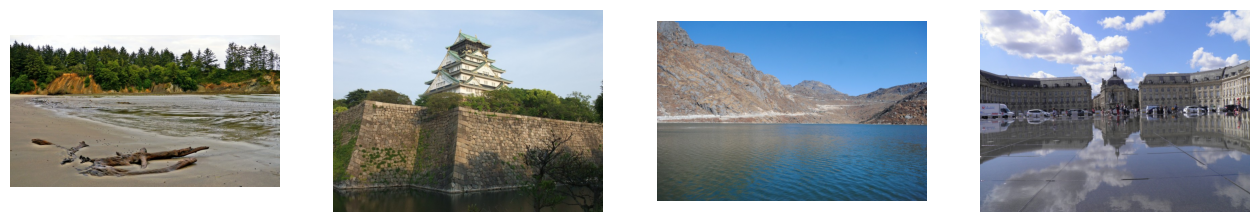

In [46]:
print("4 Sample images from random classes")

fig = plt.figure(figsize=(16,16))

# List all files in base_path
all_images = [f for f in os.listdir(base_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Pick 4 random images
sample_images = random.sample(all_images, 4)

# Plot them
for i, img_file in enumerate(sample_images, 1):
    img_path = os.path.join(base_path, img_file)
    img = np.array(Image.open(img_path))
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [47]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential 
tf.compat.v1.disable_eager_execution()


In [48]:
# Parameters
learning_rate = 0.0001
decay_speed = 1e-6
momemtum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout (0.5)
drop_layer2 = Dropout (0.5)


In [49]:
# model = Sequential()
# for layer in source_model.layers[:-1]:
#     if layer == source_model.layers[-25]: 
#         model. add (BatchNormalization())
#     model.add(layer)
# model.add(Dense(num_cls, activation = "softmax")) 
# model.summary()
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

num_cls = 10  # example, set your number of classes

model = Sequential()

for i, layer in enumerate(source_model.layers[:-1]):  
    # Freeze earlier layers
    layer.trainable = False
    
    # Insert BatchNorm after a certain layer (e.g., -25th from the end)
    model.add(layer)
    if i == len(source_model.layers) - 25:
        model.add(BatchNormalization())

# Add new classifier head
model.add(Dense(num_cls, activation="softmax"))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)         │ (None, 224, 224, 64)  │        1,792 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_4         │ (None, 224, 224, 64)  │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block1_conv2 (Conv2D)         │ (None, 224, 224, 64)  │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block1_pool (MaxPooling2D)    │ (None, 112, 112, 64)  │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block2_conv1 (Conv2D)         │ (None, 112, 112, 128) │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block2_conv2 (Conv2D)         │ (None, 112, 112, 128) │      147,584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 56, 56, 128)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block3_conv1 (Conv2D)         │ (None, 56, 56, 256)   │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block3_conv2 (Conv2D)         │ (None, 56, 56, 256)   │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block3_conv3 (Conv2D)         │ (None, 56, 56, 256)   │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block3_conv4 (Conv2D)         │ (None, 56, 56, 256)   │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block3_pool (MaxPooling2D)    │ (None, 28, 28, 256)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block4_conv1 (Conv2D)         │ (None, 28, 28, 512)   │    1,180,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block4_conv2 (Conv2D)         │ (None, 28, 28, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block4_conv3 (Conv2D)         │ (None, 28, 28, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block4_conv4 (Conv2D)         │ (None, 28, 28, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block4_pool (MaxPooling2D)    │ (None, 14, 14, 512)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block5_conv1 (Conv2D)         │ (None, 14, 14, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block5_conv2 (Conv2D)         │ (None, 14, 14, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block5_conv3 (Conv2D)         │ (None, 14, 14, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block5_conv4 (Conv2D)         │ (None, 14, 14, 512)   │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ block5_pool (MaxPooling2D)    │ (None, 7, 7, 512)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 25088)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ fc1 (Dense)                   │ (None, 4096)          │  102,764,544 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ fc2 (Dense)                   │ (None, 4096)          │   16,781,312 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │ 

 Total params: 139,611,466 (532.58 MB)

 Trainable params: 41,098 (160.54 KB)

 Non-trainable params: 139,570,368 (532.42 MB)

In [50]:
from tensorflow.keras import optimizers

optim1 = optimizers.RMSprop(learning_rate=learning_rate)

model.compile(
    optimizer=optim1,
    loss=loss_function,
    metrics=["accuracy"]
)

In [51]:
import cv2

# def image_reshape(im, target_size):
#     return cv2.resize(im, target_size)   # target_size must be (width, height)
def image_reshape(im, target_size):
    if im is None:
        # return a black image placeholder if missing
        return np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)
    return cv2.resize(im, target_size)


In [52]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    end_img = min(start + batch_size, len(dataframe))

    for idx in range(start, end_img):
        im, label = get_image_from_number(idx, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)

    label_array = encode_label(label_array)
    return np.array(image_array), np.array(label_array)


In [25]:
import numpy as np
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

# split
train = df.sample(frac=0.8, random_state=42)  # 80% train
val = df.drop(train.index)                   # 20% val

print(len(train))
print(len(val))

NameError: name 'df' is not defined

In [10]:
import numpy as np
for e in range(epochs):
    print("Epoch :" + str (e+1) + "/"+ str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)

        model.train_on_batch(X_train, y_train) 

model.save("Model")


Epoch :1/1


NameError: name 'train' is not defined